<a href="https://colab.research.google.com/github/sahay-46/shruti_ranjan/blob/ML_Lab/Multiple_LinearReg(2348545_T2).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
data = pd.read_csv("/content/delivery.csv")
data.head()

,n.prod,distance,delTime
0,7,560,16.68
1,3,220,11.50
2,3,340,12.03
3,4,80,14.88
4,6,150,13.75


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   n.prod    25 non-null     int64  
 1   distance  25 non-null     int64  
 2   delTime   25 non-null     float64
dtypes: float64(1), int64(2)
memory usage: 728.0 bytes


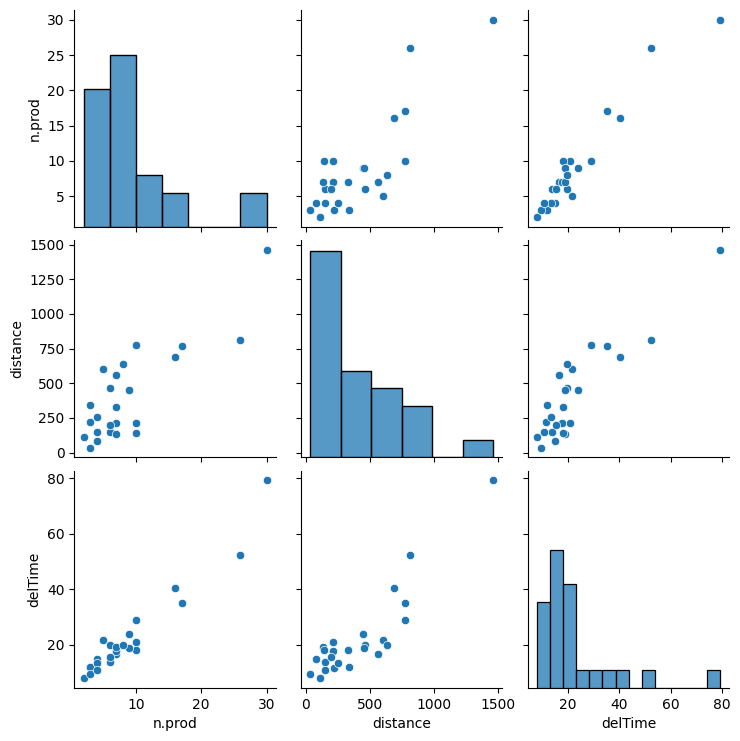

In [5]:
sns.pairplot(data)

In [6]:
# Importing the required model
from sklearn.linear_model import LinearRegression

# Initiating the algo to build the model
model = LinearRegression()

# Selecting the predictors and targets
x = data[['n.prod','distance']]
y = data['delTime']

# Building the model using fit method
model.fit(x,y)

print("Intercept:",model.intercept_,'\nCoefficient',model.coef_)


Intercept: 2.3412311451922108 
Coefficient [1.61590721 0.01438483]


In [7]:
# finding the correlation
np.corrcoef(data['n.prod'],data['distance'])

array([[1.      , 0.824215],
       [0.824215, 1.      ]])

Coefficient of Determination

In [8]:
# score() for regression model,returns the coefficient of determiantion
model.score(x,y)

0.9595937494832257

**Rsquared value can be inflated by including more and more predictor variables**

In [10]:
# Model1 with single Predictor
model1 = LinearRegression()
features=['n.prod']
target=['delTime']
model1.fit(data[features],data[target])
print(model1.score(data[features],data[target]))

0.9304813135986856


In [12]:
# Model 2 with multiple predictors: n.prod,distance
model2 = LinearRegression()
features=['n.prod','distance']
target=['delTime']
model2.fit(data[features],data[target])
print(model2.score(data[features],data[target]))


0.9595937494832257


**Adjusted R-Squared Error**

In [14]:
# Computation of adjusted r-Squared
x=data[features]
y=data[target]
adjusted_rscore= 1 - (1 - model2.score(x,y)) * (len(y)-1)/(len(y)-x.shape[1]-1)
print(adjusted_rscore)

0.9559204539817008


**Variance Inflation Factor(VIF)**

In [17]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
# calculating for VIF for each attribute

vif = pd.Series([variance_inflation_factor(x.values,idx)
              for idx in range(x.shape[1])],
              index=x.columns)
print(vif)

n.prod      7.848245
distance    7.848245
dtype: float64
